# Config

In [65]:
# parameters
SAVE_OUTPUT = True
SIZE_PLOTS = (12,10)
BUFFER_SIZE = 402.336 
YEAR = 2024

#Location of the data
INPUT_DATA_PATH = "../data/raw/strava"
OUTPUT_DATA_PATH = "../data/interim/"
OUTPUT_FIGURES_PATH = "../reports/figures/"

In [66]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path


In [67]:
#Make a function to plot the data
def plot_hexagons(gdf, column, title, municipalities, size=SIZE_PLOTS):
    ax = gdf.plot(figsize=size, column=column, legend=True, cmap='viridis', edgecolor=None)
    ax.set_title(title)
    municipalities.plot(ax=ax, facecolor='none', edgecolor='grey')
    return ax

# Load data

In [68]:
# Commute data from Strava
commute_origins=pd.read_csv(Path(INPUT_DATA_PATH) / f"commute_{YEAR}_origins.csv")
commute_destinations=pd.read_csv(Path(INPUT_DATA_PATH) / f"commute_{YEAR}_destinations.csv")
hexagons = gpd.read_file(Path(INPUT_DATA_PATH) / f"commute_{YEAR}_polygon.shp")


In [69]:
# Leisure data from Strava
leisure_origins=pd.read_csv(Path(INPUT_DATA_PATH) / f"leisure_{YEAR}_origins.csv")
leisure_destinations=pd.read_csv(Path(INPUT_DATA_PATH) / f"leisure_{YEAR}_destinations.csv")
hexagons = gpd.read_file(Path(INPUT_DATA_PATH) / f"leisure_{YEAR}_polygon.shp")


In [70]:
# Read municipalities
municipalities = gpd.read_file("../data/external/municipalitites/municipalitites.gpkg")

# Data management

## Explore data

In [71]:
#Explore fines_per_infraction
print(hexagons.shape)
print(hexagons.columns)
print(hexagons.dtypes)
hexagons.head()

(11996, 2)
Index(['hex_id', 'geometry'], dtype='object')
hex_id        object
geometry    geometry
dtype: object


,hex_id,geometry
0,883944066dfffff,"POLYGON ((2.09298 41.86371, 2.09886 41.86557, ..."
1,88394450dbfffff,"POLYGON ((1.58345 41.59172, 1.58928 41.59360, ..."
2,883944a1c7fffff,"POLYGON ((2.31651 42.06080, 2.32243 42.06266, ..."
3,8839441645fffff,"POLYGON ((1.98377 41.99099, 1.98966 41.99286, ..."
4,88394420b3fffff,"POLYGON ((2.57972 41.70524, 2.58563 41.70708, ..."


### Commute

In [72]:
#Explore commute_origins
print(commute_origins.shape)
print(commute_origins.columns)
print(commute_origins.dtypes)
commute_origins.head()

(1701, 11)
Index(['hex_id', 'date', 'origins_or_destinations', 'activity_types',
       'commute_count', 'morning_commute_count', 'midday_commute_count',
       'evening_commute_count', 'overnight_commute_count',
       'weekday_commute_count', 'weekend_commute_count'],
      dtype='object')
hex_id                     object
date                        int64
origins_or_destinations    object
activity_types             object
commute_count               int64
morning_commute_count       int64
midday_commute_count        int64
evening_commute_count       int64
overnight_commute_count     int64
weekday_commute_count       int64
weekend_commute_count       int64
dtype: object


,hex_id,date,origins_or_destinations,activity_types,commute_count,morning_commute_count,midday_commute_count,evening_commute_count,overnight_commute_count,weekday_commute_count,weekend_commute_count
0,8839440043fffff,2024,origins,"Ride,EBikeRide",20,10,5,0,0,15,5
1,88394404e3fffff,2024,origins,"Ride,EBikeRide",40,15,10,15,0,35,0
2,883944001dfffff,2024,origins,"Ride,EBikeRide",0,0,0,0,0,0,0
3,88394411d9fffff,2024,origins,"Ride,EBikeRide",15,0,15,0,0,0,15
4,88394404d5fffff,2024,origins,"Ride,EBikeRide",20,15,5,0,0,15,0


In [73]:
#Explore commute_destinations
print(commute_destinations.shape)
print(commute_destinations.columns)
print(commute_destinations.dtypes)
commute_destinations.head()

(1708, 11)
Index(['hex_id', 'date', 'origins_or_destinations', 'activity_types',
       'commute_count', 'morning_commute_count', 'midday_commute_count',
       'evening_commute_count', 'overnight_commute_count',
       'weekday_commute_count', 'weekend_commute_count'],
      dtype='object')
hex_id                     object
date                        int64
origins_or_destinations    object
activity_types             object
commute_count               int64
morning_commute_count       int64
midday_commute_count        int64
evening_commute_count       int64
overnight_commute_count     int64
weekday_commute_count       int64
weekend_commute_count       int64
dtype: object


,hex_id,date,origins_or_destinations,activity_types,commute_count,morning_commute_count,midday_commute_count,evening_commute_count,overnight_commute_count,weekday_commute_count,weekend_commute_count
0,8839440043fffff,2024,destinations,"Ride,EBikeRide",15,0,5,10,0,10,5
1,88394404e3fffff,2024,destinations,"Ride,EBikeRide",30,0,25,0,0,25,5
2,88394400e7fffff,2024,destinations,"Ride,EBikeRide",10,5,5,5,0,5,5
3,88394411d9fffff,2024,destinations,"Ride,EBikeRide",10,0,10,0,0,0,10
4,88394404d5fffff,2024,destinations,"Ride,EBikeRide",15,0,5,5,0,10,5


### Leisure

In [74]:
#Explore leisure_origins
print(leisure_origins.shape)
print(leisure_origins.columns)
print(leisure_origins.dtypes)
leisure_origins.head()

(3722, 11)
Index(['hex_id', 'date', 'origins_or_destinations', 'activity_types',
       'leisure_count', 'morning_leisure_count', 'midday_leisure_count',
       'evening_leisure_count', 'overnight_leisure_count',
       'weekday_leisure_count', 'weekend_leisure_count'],
      dtype='object')
hex_id                     object
date                        int64
origins_or_destinations    object
activity_types             object
leisure_count               int64
morning_leisure_count       int64
midday_leisure_count        int64
evening_leisure_count       int64
overnight_leisure_count     int64
weekday_leisure_count       int64
weekend_leisure_count       int64
dtype: object


,hex_id,date,origins_or_destinations,activity_types,leisure_count,morning_leisure_count,midday_leisure_count,evening_leisure_count,overnight_leisure_count,weekday_leisure_count,weekend_leisure_count
0,8839440307fffff,2024,origins,"Ride,EBikeRide",10,0,0,10,0,10,0
1,8839440cbbfffff,2024,origins,"Ride,EBikeRide",0,0,0,0,0,0,0
2,8839440b47fffff,2024,origins,"Ride,EBikeRide",15,15,0,0,0,10,0
3,8839440d8dfffff,2024,origins,"Ride,EBikeRide",25,15,10,5,0,25,5
4,8839440457fffff,2024,origins,"Ride,EBikeRide",110,50,25,30,0,80,30


In [75]:
#Explore leisure_destinations
print(leisure_destinations.shape)
print(leisure_destinations.columns)
print(leisure_destinations.dtypes)
leisure_destinations.head()

(3661, 11)
Index(['hex_id', 'date', 'origins_or_destinations', 'activity_types',
       'leisure_count', 'morning_leisure_count', 'midday_leisure_count',
       'evening_leisure_count', 'overnight_leisure_count',
       'weekday_leisure_count', 'weekend_leisure_count'],
      dtype='object')
hex_id                     object
date                        int64
origins_or_destinations    object
activity_types             object
leisure_count               int64
morning_leisure_count       int64
midday_leisure_count        int64
evening_leisure_count       int64
overnight_leisure_count     int64
weekday_leisure_count       int64
weekend_leisure_count       int64
dtype: object


,hex_id,date,origins_or_destinations,activity_types,leisure_count,morning_leisure_count,midday_leisure_count,evening_leisure_count,overnight_leisure_count,weekday_leisure_count,weekend_leisure_count
0,8839440567fffff,2024,destinations,"Ride,EBikeRide",0,0,0,0,0,0,0
1,883944016dfffff,2024,destinations,"Ride,EBikeRide",0,0,0,0,0,0,0
2,8839440b47fffff,2024,destinations,"Ride,EBikeRide",15,0,10,0,0,10,0
3,8839440d8dfffff,2024,destinations,"Ride,EBikeRide",75,0,55,15,0,45,30
4,8839440457fffff,2024,destinations,"Ride,EBikeRide",125,0,85,15,25,90,35


## Select rellevant attributes & Join data

In [76]:
# Commute 
commute_origins = commute_origins[['hex_id', 'date','commute_count','weekday_commute_count', 'weekend_commute_count']]
commute_destinations = commute_destinations[['hex_id', 'date','commute_count','weekday_commute_count', 'weekend_commute_count']]
commute = pd.merge(commute_origins, commute_destinations, on=['hex_id', 'date'], suffixes=('_origin', '_destination'), how='outer')

# leisure
leisure_origins = leisure_origins[['hex_id', 'date','leisure_count','weekday_leisure_count', 'weekend_leisure_count']]
leisure_destinations = leisure_destinations[['hex_id', 'date','leisure_count','weekday_leisure_count', 'weekend_leisure_count']]
leisure = pd.merge(leisure_origins, leisure_destinations, on=['hex_id', 'date'], suffixes=('_origin', '_destination'), how='outer')

# Merge commute and leisure
df = pd.merge(commute, leisure, on=['hex_id', 'date'], how='outer')

# Merge with hexagons
gdf = pd.merge(hexagons, df, on='hex_id', how='outer')



In [77]:
#Check
print(gdf.shape)
print(gdf.columns)
print(gdf.dtypes)
gdf.head()

(11996, 15)
Index(['hex_id', 'geometry', 'date', 'commute_count_origin',
       'weekday_commute_count_origin', 'weekend_commute_count_origin',
       'commute_count_destination', 'weekday_commute_count_destination',
       'weekend_commute_count_destination', 'leisure_count_origin',
       'weekday_leisure_count_origin', 'weekend_leisure_count_origin',
       'leisure_count_destination', 'weekday_leisure_count_destination',
       'weekend_leisure_count_destination'],
      dtype='object')
hex_id                                 object
geometry                             geometry
date                                  float64
commute_count_origin                  float64
weekday_commute_count_origin          float64
weekend_commute_count_origin          float64
commute_count_destination             float64
weekday_commute_count_destination     float64
weekend_commute_count_destination     float64
leisure_count_origin                  float64
weekday_leisure_count_origin          float6

,hex_id,geometry,date,commute_count_origin,weekday_commute_count_origin,weekend_commute_count_origin,commute_count_destination,weekday_commute_count_destination,weekend_commute_count_destination,leisure_count_origin,weekday_leisure_count_origin,weekend_leisure_count_origin,leisure_count_destination,weekday_leisure_count_destination,weekend_leisure_count_destination
0,883944066dfffff,"POLYGON ((2.09298 41.86371, 2.09886 41.86557, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,88394450dbfffff,"POLYGON ((1.58345 41.59172, 1.58928 41.59360, ...",2024.0,15.0,15.0,0.0,0.0,0.0,0.0,635.0,430.0,205.0,630.0,435.0,195.0
2,883944a1c7fffff,"POLYGON ((2.31651 42.06080, 2.32243 42.06266, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8839441645fffff,"POLYGON ((1.98377 41.99099, 1.98966 41.99286, ...",2024.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,10.0,10.0,30.0,15.0,10.0
4,88394420b3fffff,"POLYGON ((2.57972 41.70524, 2.58563 41.70708, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Spatial Operations

In [78]:
#Ensure CRS
print(gdf.crs)
print(municipalities.crs)

#Project to local 25831
gdf = gdf.to_crs(epsg=25831)
municipalities = municipalities.to_crs(epsg=25831)

EPSG:4326
EPSG:3857


In [79]:
#Filter the municipalities that are in the hexagons
print(municipalities.shape)
municipalities_Barcelona = municipalities[municipalities.geometry.within(gdf.unary_union)]
print(municipalities_Barcelona.shape)

(8205, 8)
(311, 8)


## Data visualization

<Axes: title={'center': 'Leisure count destination'}>

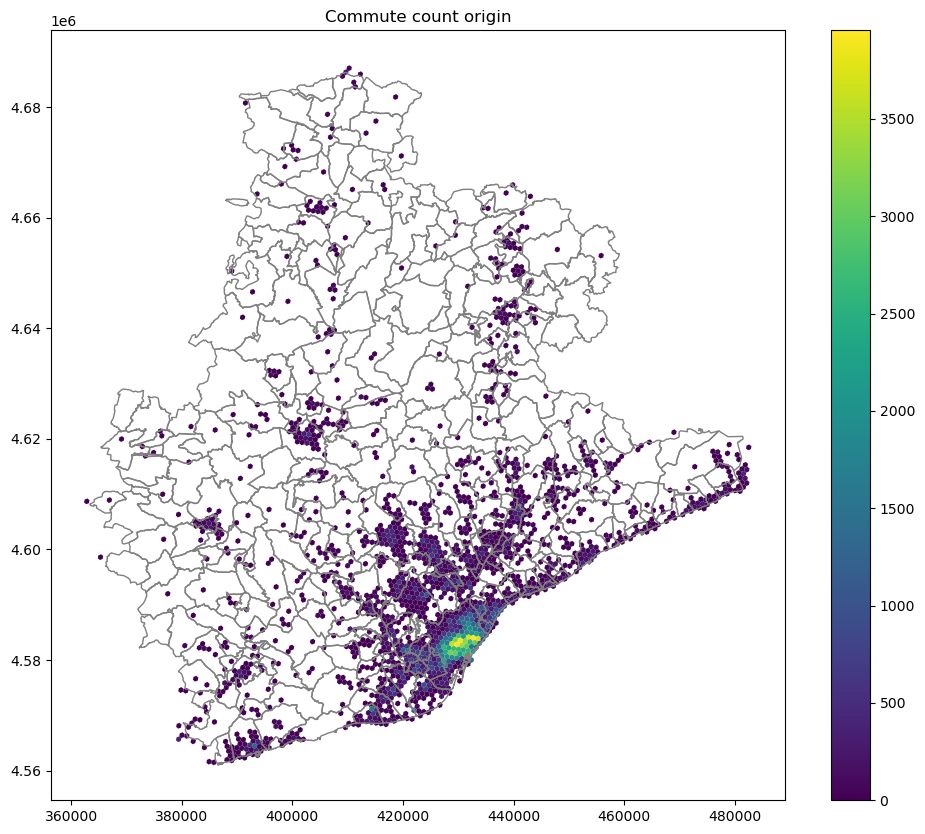

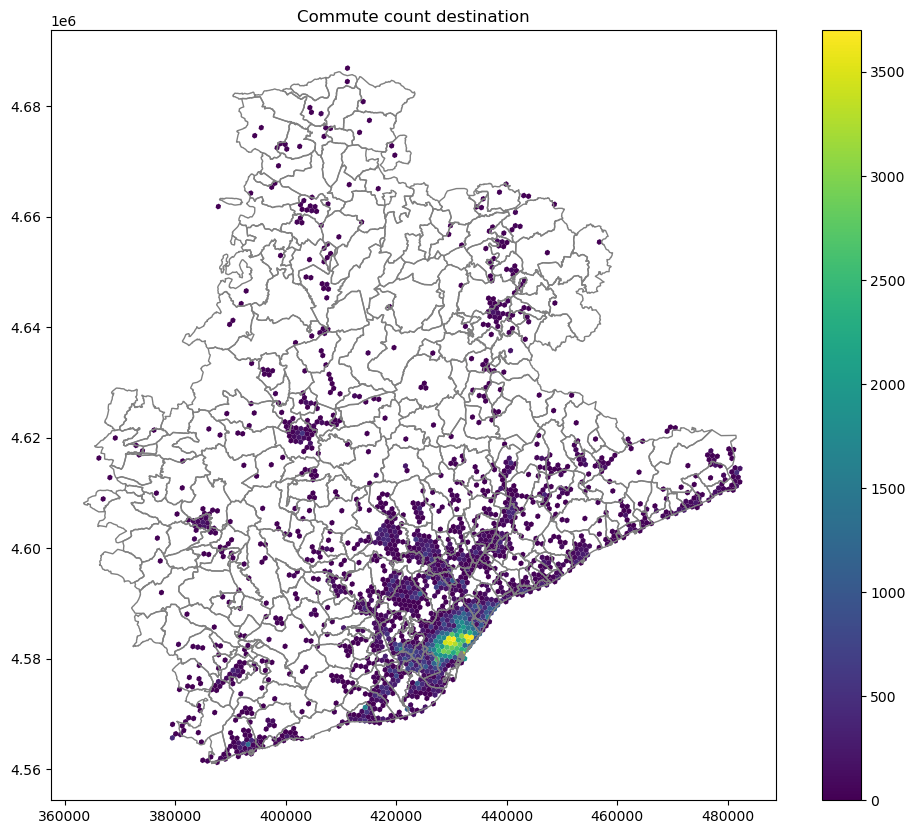

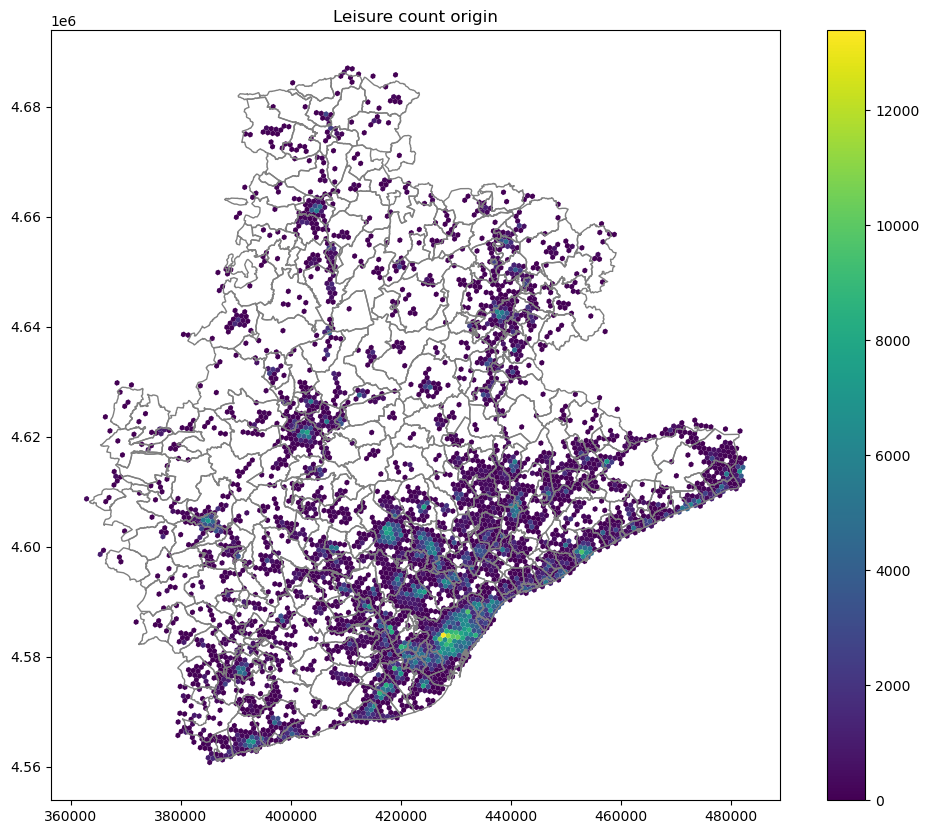

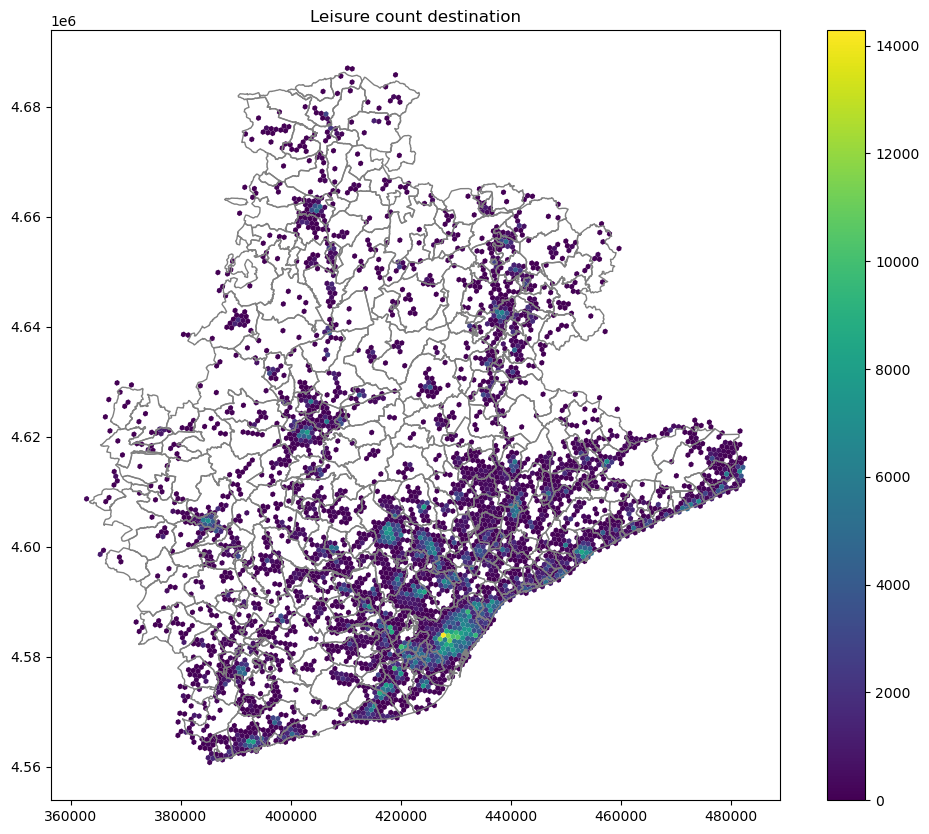

In [80]:
#Plot the hexagons
plot_hexagons(gdf, 'commute_count_origin', 'Commute count origin', municipalities_Barcelona)
plot_hexagons(gdf, 'commute_count_destination', 'Commute count destination', municipalities_Barcelona)
plot_hexagons(gdf, 'leisure_count_origin', 'Leisure count origin', municipalities_Barcelona)
plot_hexagons(gdf, 'leisure_count_destination', 'Leisure count destination', municipalities_Barcelona)


# Focus on Barcelona

## Filter data

In [81]:
#Get polygon of Barcelona city
barcelona = municipalities_Barcelona[municipalities_Barcelona["NAMEUNIT"] == "Barcelona"]
print(barcelona.shape)

#Get the hexagons that are in Barcelona
gdf_Barcelona = gpd.overlay(gdf, barcelona, how='intersection')
print(gdf_Barcelona.shape)

(1, 8)
(185, 22)


## Visualize

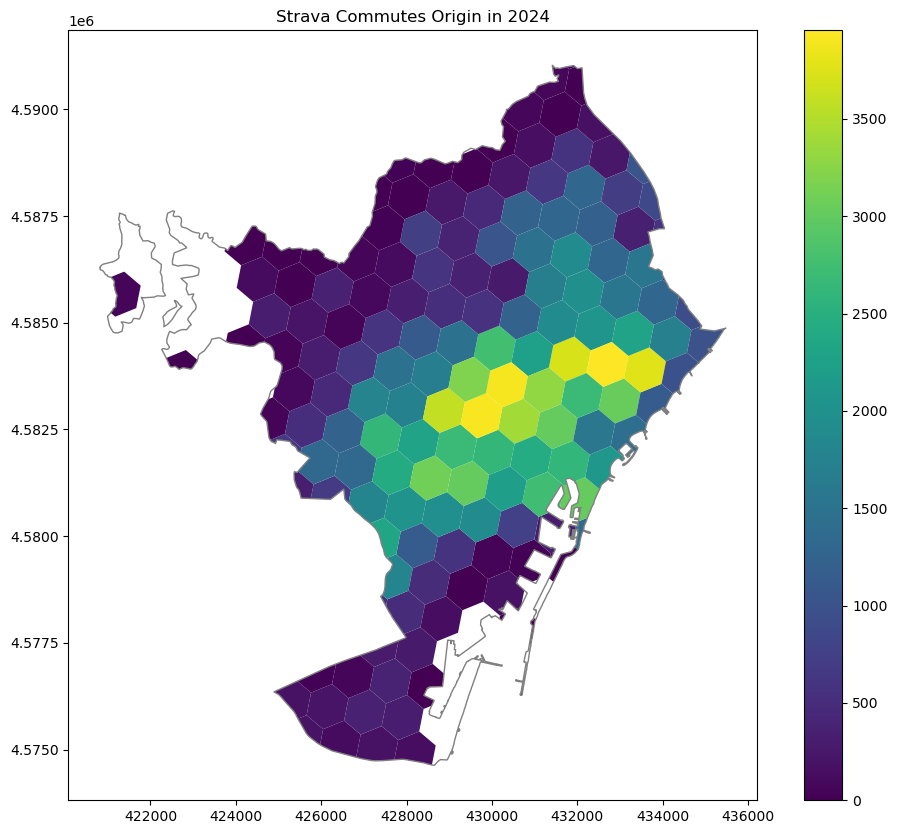

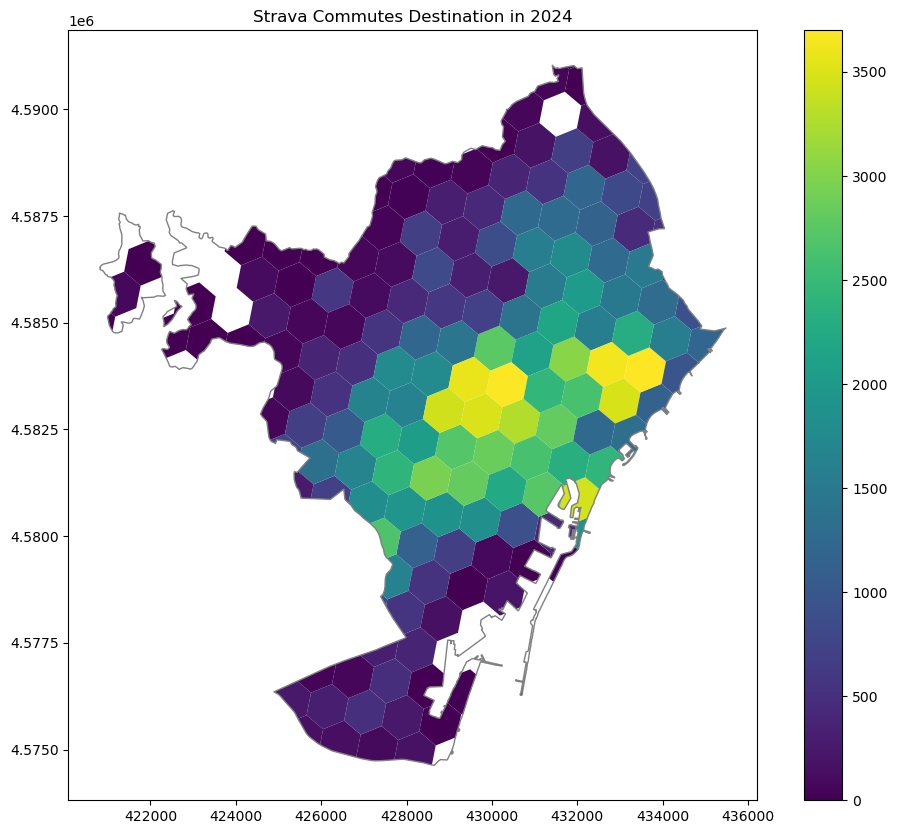

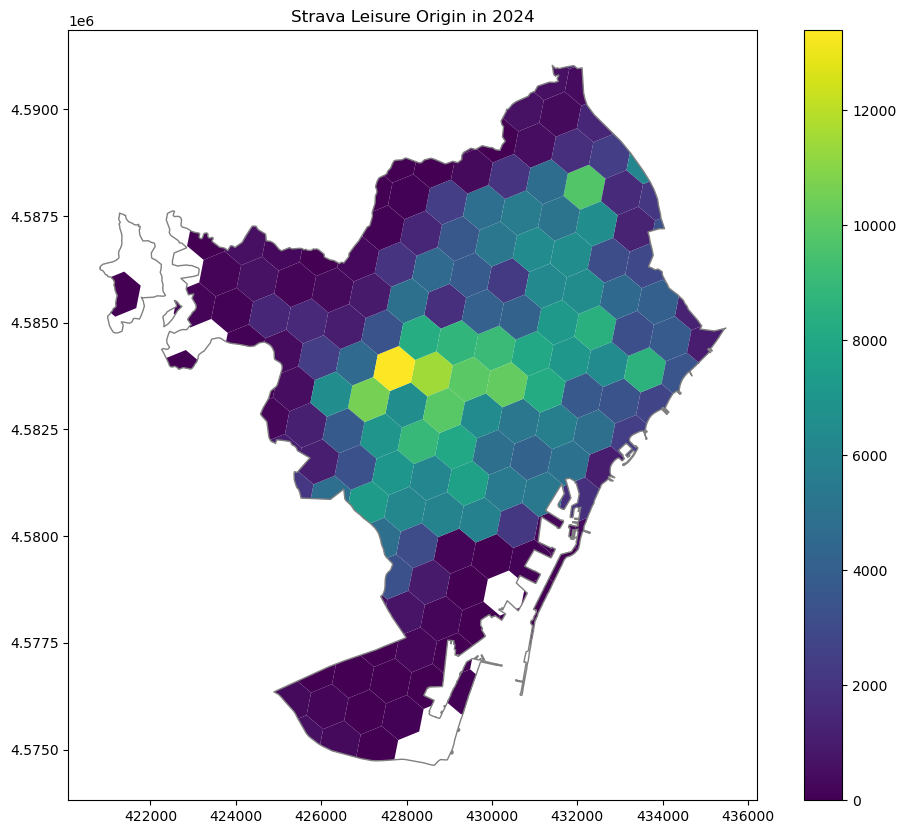

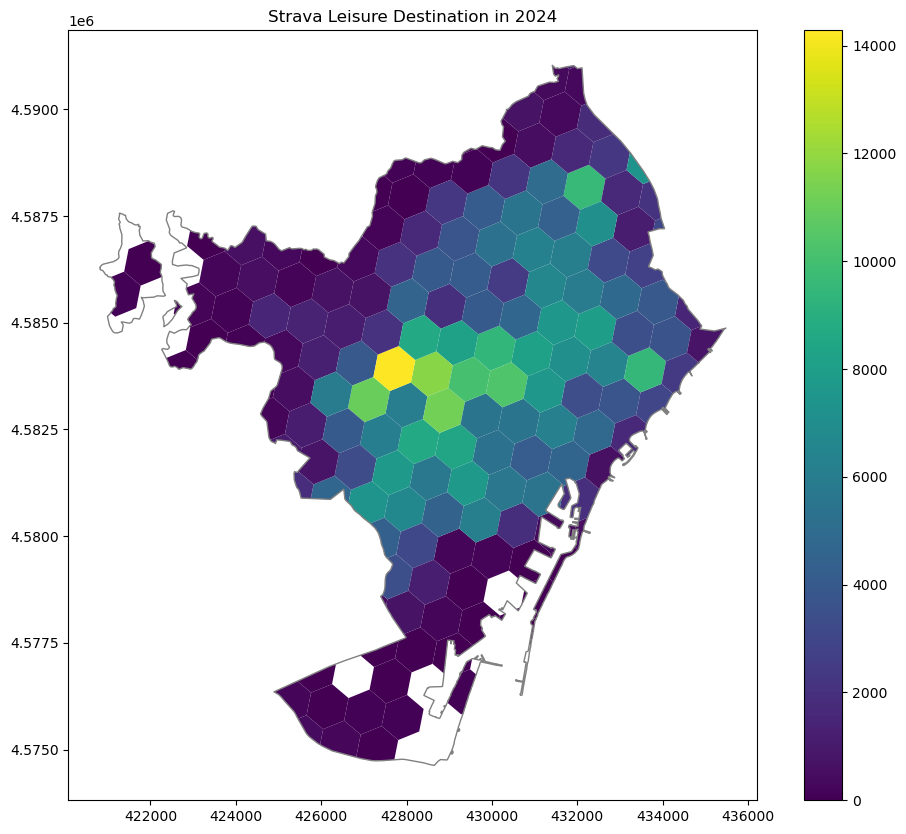

In [82]:
#Plots for Barcelona
fig_origin_commute_barcelona_city = plot_hexagons(gdf_Barcelona, 'commute_count_origin', 'Strava Commutes Origin in 2024', barcelona)
fig_destination_commute_barcelona_city = plot_hexagons(gdf_Barcelona, 'commute_count_destination', 'Strava Commutes Destination in 2024', barcelona)
fig_origin_leisure_barcelona_city = plot_hexagons(gdf_Barcelona, 'leisure_count_origin', 'Strava Leisure Origin in 2024', barcelona)
fig_destination_leisure_barcelona_city = plot_hexagons(gdf_Barcelona, 'leisure_count_destination', 'Strava Leisure Destination in 2024', barcelona)


## Save output

In [90]:
if SAVE_OUTPUT:
    #Save plots
    fig_origin_commute_barcelona_city.figure.savefig(Path(OUTPUT_FIGURES_PATH) / 'fig_origin_commute_barcelona_city.png')
    fig_destination_commute_barcelona_city.figure.savefig(Path(OUTPUT_FIGURES_PATH) / 'fig_destination_commute_barcelona_city.png')
    fig_origin_leisure_barcelona_city.figure.savefig(Path(OUTPUT_FIGURES_PATH) / 'fig_origin_leisure_barcelona_city.png')
    fig_destination_leisure_barcelona_city.figure.savefig(Path(OUTPUT_FIGURES_PATH) / 'fig_destination_leisure_barcelona_city.png')
    #Save data
    gdf.to_parquet(Path(OUTPUT_DATA_PATH) / f'strava_hexagons_{YEAR}.parquet')
    gdf_Barcelona.to_parquet(Path(OUTPUT_DATA_PATH) / f'strava_hexagons_Barcelona_{YEAR}.parquet')

## Watermark

In [84]:
!python -m pip install watermark --quiet

In [85]:
%load_ext watermark

In [86]:
%watermark

Last updated: 2025-03-19T11:15:47.394057+01:00

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.25.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
CPU cores   : 16
Architecture: 64bit



In [87]:
%watermark --iversions

numpy    : 1.24.4
geopandas: 0.13.2
pandas   : 2.0.3



In [88]:
!lsb_release -a

"lsb_release" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
